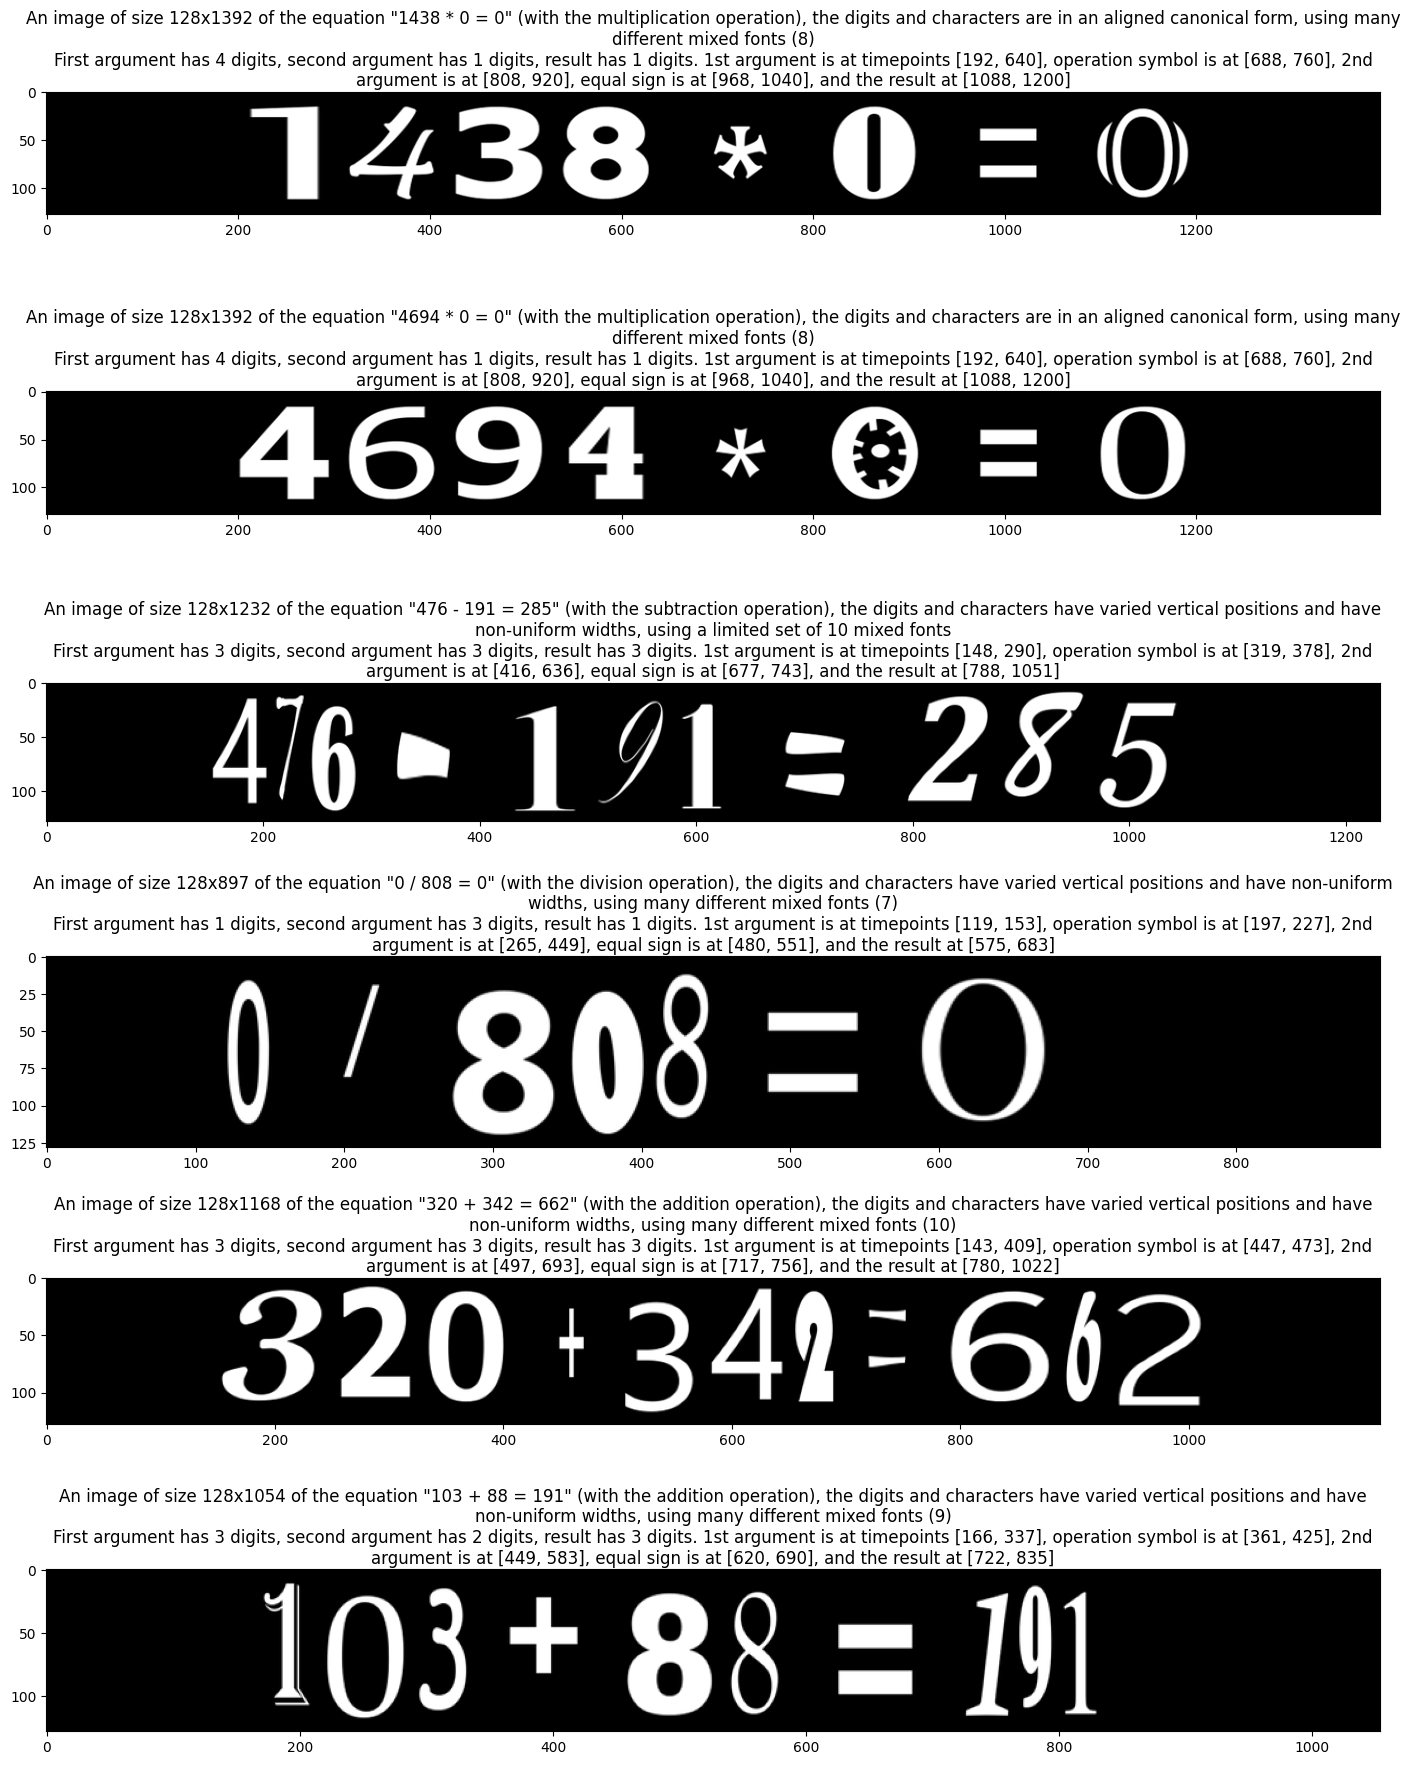

In [46]:
#%% Display a few samples from the dataset and their descriptions

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import glob
from PIL import Image

# Set the path to your dataset
dataset_foldername = 'math_equations_images_dataset_medium'
curr_file_path = os.path.abspath(os.path.dirname(__file__))
# curr_file_path = r"C:\Users\david\Desktop\Code\ImSME-dataset"

downloaded_from_kaggle = True
if downloaded_from_kaggle:
    dataset_folder = os.path.join(curr_file_path, 'data', dataset_foldername, dataset_foldername)
else:
    dataset_folder = os.path.join(curr_file_path, 'data', dataset_foldername)

csv_file = glob.glob(os.path.join(dataset_folder, 'simple_math_equation_images__*.csv'))[0]

# Load the CSV file
df = pd.read_csv(os.path.join(dataset_folder, csv_file))

# Number of samples to display
num_samples_to_show = 6

# Randomly sample rows from the dataframe
sampled_rows = df.sample(n=num_samples_to_show)

# Create a figure with num_samples_to_show rows and 1 column
fig, axs = plt.subplots(num_samples_to_show, 1, figsize=(14, 3 * num_samples_to_show))

for i, (_, row) in enumerate(sampled_rows.iterrows()):
    # Load the image
    img_path = os.path.join(dataset_folder, 'equation_images', row['image_filename'])
    img = Image.open(img_path)
    
    # Display the image
    axs[i].imshow(img, cmap='gray')
    
    # Set the title (simple description + '\n' + additional description)
    axs[i].set_title(row['simple_description'] + '\n' + row['additional_description'], wrap=True)

plt.tight_layout()



# Print basic summary statistics

In [11]:
# Print basic summary statistics

print('-' * 78)
print('Counts of unique values in the operation column sorted by frequency:')
print('-' * 68)
operation_counts = df['operation'].value_counts()
for op, count in operation_counts.items():
    print(f'"{op}": {count}')

for column in ['first argument', 'second argument', 'result']:
    print('-' * 78)
    print(f'4 most/least common {column} values and their counts:')
    print('-' * 60)
    value_counts = df[column].value_counts()
    for value, count in value_counts.head(4).items():
        print(f'"{value}": {count}')
    print('...')
    for value, count in value_counts.tail(4).items():
        print(f'"{value}": {count}')

print('-' * 78)


------------------------------------------------------------------------------
Counts of unique values in the operation column sorted by frequency:
--------------------------------------------------------------------
"-": 65536
"*": 65536
"+": 65536
"/": 65536
------------------------------------------------------------------------------
4 most/least common first argument values and their counts:
------------------------------------------------------------
"0": 5136
"1": 3984
"2": 1976
"3": 1360
...
"7742": 8
"8118": 8
"8831": 8
"9308": 8
------------------------------------------------------------------------------
4 most/least common second argument values and their counts:
------------------------------------------------------------
"0": 36752
"1": 5120
"2": 3328
"3": 2496
...
"763": 48
"977": 48
"952": 48
"943": 40
------------------------------------------------------------------------------
4 most/least common result values and their counts:
--------------------------------------

# Display a single equation image with its labels

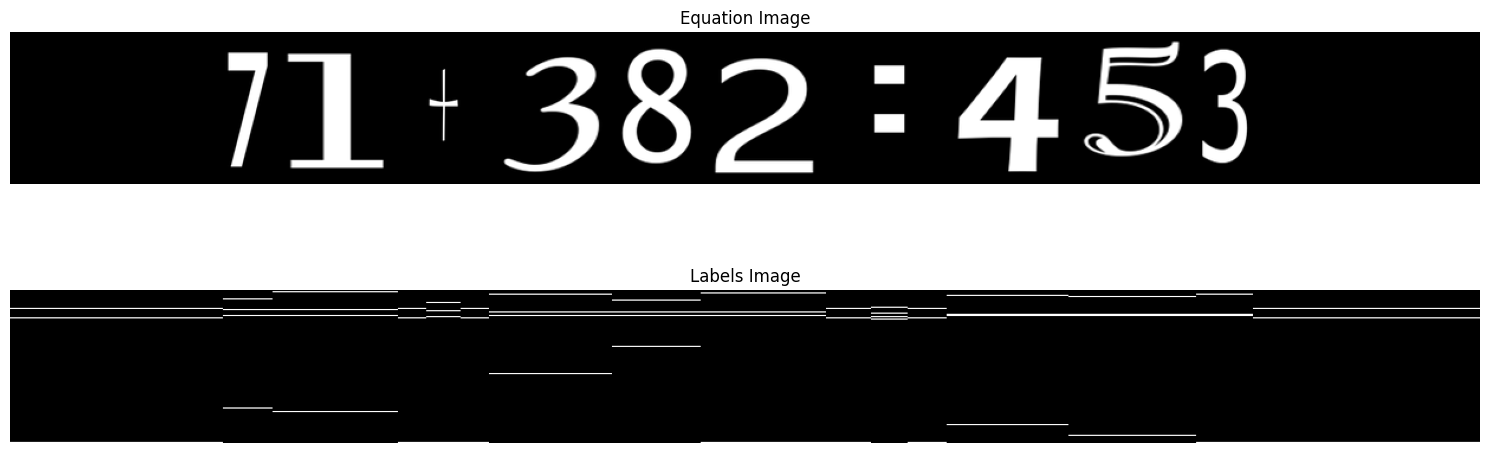

In [19]:
# Display a single equation image with its labels

# Randomly select a single row from the dataframe
selected_row = df.sample(n=1).iloc[0]

# Load the equation image
eq_img_path = os.path.join(dataset_folder, 'equation_images', selected_row['image_filename'])
eq_img = Image.open(eq_img_path)

# Load the labels image
label_img_path = os.path.join(dataset_folder, 'label_images', selected_row['image_filename'])
label_img = Image.open(label_img_path)

# Create the first figure with 2x1 subplot
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Display the equation image
ax1.imshow(eq_img, cmap='gray')
ax1.set_title("Equation Image")
ax1.axis('off')

# Display the full labels image
ax2.imshow(label_img, cmap='gray')
ax2.set_title("Labels Image")
ax2.axis('off')

plt.tight_layout()
plt.show()


# Now create an additional figure with 4x1 subplot with all labels parts separated and annotated

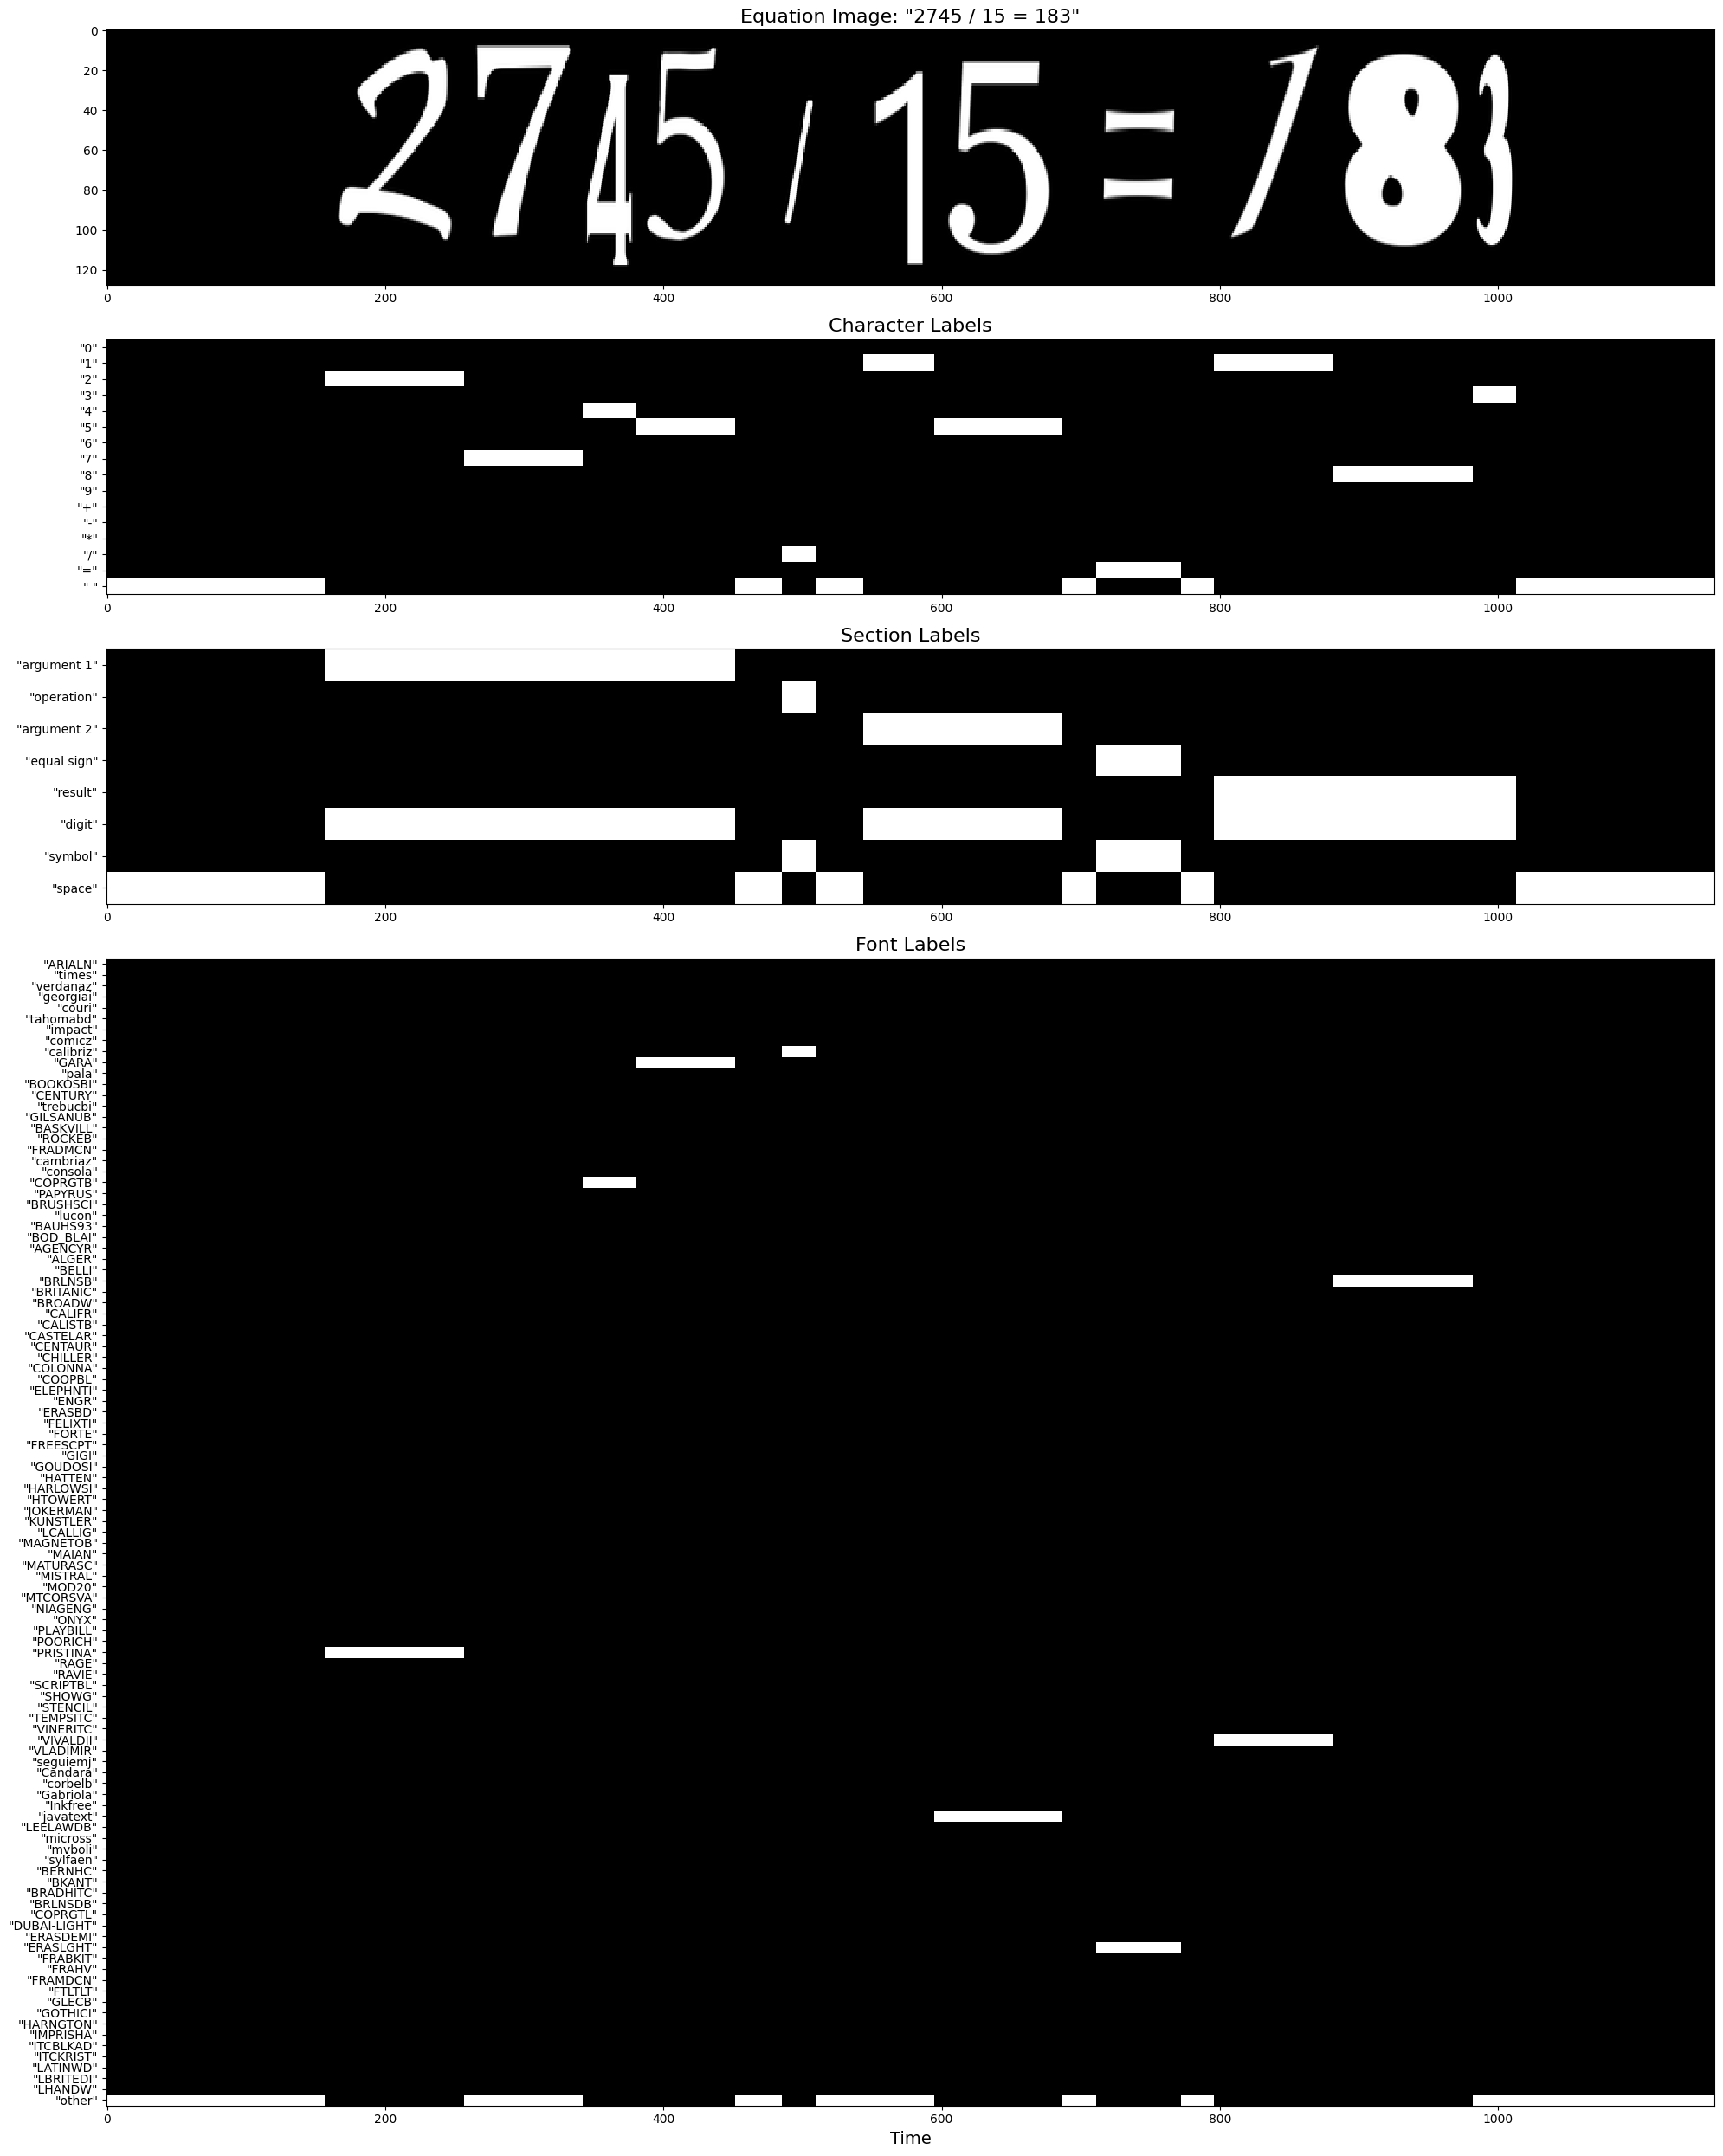

Equation: 2745 / 15 = 183
Simple description: An image of size 128x1156 of the equation "2745 / 15 = 183" (with the division operation), the digits and characters have varied vertical positions and have non-uniform widths, using many different mixed fonts (11)
Additional description: First argument has 4 digits, second argument has 2 digits, result has 3 digits. 1st argument is at timepoints [157, 452], operation symbol is at [485, 510], 2nd argument is at [544, 686], equal sign is at [711, 772], and the result at [796, 1013]


In [41]:
# Randomly select a single row from the dataframe
selected_row = df.sample(n=1).iloc[0]

# Load the equation image
eq_img_path = os.path.join(dataset_folder, 'equation_images', selected_row['image_filename'])
eq_img = Image.open(eq_img_path)

# Load the labels image
label_img_path = os.path.join(dataset_folder, 'label_images', selected_row['image_filename'])
label_img = Image.open(label_img_path)

# Convert labels image to numpy array
label_array = np.array(label_img)


# Get the heights of each part
char_order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '*', '/', '=', ' ']
section_order = ["argument 1", "operation", "argument 2", "equal sign", "result", "digit", "symbol", "space"]
font_order = [
    'ARIALN', 'times', 'verdanaz', 'georgiai', 'couri', 'tahomabd', 'impact', 'comicz',
    'calibriz', 'GARA', 'pala', 'BOOKOSBI', 'CENTURY', 'trebucbi', 'GILSANUB', 'BASKVILL',
    'ROCKEB', 'FRADMCN', 'cambriaz', 'consola', 'COPRGTB', 'PAPYRUS', 'BRUSHSCI', 'lucon',
    'BAUHS93', 'BOD_BLAI', 'AGENCYR', 'ALGER', 'BELLI', 'BRLNSB', 'BRITANIC', 'BROADW',
    'CALIFR', 'CALISTB', 'CASTELAR', 'CENTAUR', 'CHILLER', 'COLONNA', 'COOPBL', 'ELEPHNTI',
    'ENGR', 'ERASBD', 'FELIXTI', 'FORTE', 'FREESCPT', 'GIGI', 'GOUDOSI', 'HATTEN',
    'HARLOWSI', 'HTOWERT', 'JOKERMAN', 'KUNSTLER', 'LCALLIG', 'MAGNETOB', 'MAIAN', 'MATURASC',
    'MISTRAL', 'MOD20', 'MTCORSVA', 'NIAGENG', 'ONYX', 'PLAYBILL', 'POORICH', 'PRISTINA',
    'RAGE', 'RAVIE', 'SCRIPTBL', 'SHOWG', 'STENCIL', 'TEMPSITC', 'VINERITC', 'VIVALDII',
    'VLADIMIR', 'seguiemj', 'Candara', 'corbelb', 'Gabriola', 'Inkfree', 'javatext', 'LEELAWDB',
    'micross', 'mvboli', 'sylfaen', 'BERNHC', 'BKANT', 'BRADHITC', 'BRLNSDB', 'COPRGTL',
    'DUBAI-LIGHT', 'ERASDEMI', 'ERASLGHT', 'FRABKIT', 'FRAHV', 'FRAMDCN', 'FTLTLT', 'GLECB',
    'GOTHICI', 'HARNGTON', 'IMPRISHA', 'ITCBLKAD', 'ITCKRIST', 'LATINWD', 'LBRITEDI', 'LHANDW'
]

# from config import CHAR_ORDER, SECTION_ORDER, FONT_ORDER
# char_order = CHAR_ORDER
# section_order = SECTION_ORDER
# font_order = FONT_ORDER

# Split the labels image
char_height = len(char_order)
section_height = len(section_order)
font_height = len(font_order)

char_image = label_array[:char_height]
section_image = label_array[char_height:char_height+section_height]
font_image = label_array[char_height+section_height:]

# Create the main figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(20, 25), gridspec_kw={'height_ratios': [2, 2, 2, 9]})
plt.subplots_adjust(hspace=0.2)

# Plot the original equation image
axs[0].imshow(eq_img, cmap='gray', aspect='auto', interpolation='nearest')
axs[0].set_title(f'Equation Image: "{selected_row["full string"]}"', fontsize=16)

# Plot character labels
axs[1].imshow(char_image, aspect='auto', cmap='gray', interpolation='nearest')
axs[1].set_title("Character Labels", fontsize=16)
axs[1].set_yticks(range(len(char_order)))
axs[1].set_yticklabels([f'"{char}"' for char in char_order])

# Plot section labels
axs[2].imshow(section_image, aspect='auto', cmap='gray', interpolation='nearest')
axs[2].set_title("Section Labels", fontsize=16)
axs[2].set_yticks(range(len(section_order)))
axs[2].set_yticklabels([f'"{section}"' for section in section_order])

# Plot font labels
axs[3].imshow(font_image, aspect='auto', cmap='gray', interpolation='nearest')
axs[3].set_title("Font Labels", fontsize=16)
axs[3].set_yticks(range(len(font_order) + 1))
axs[3].set_yticklabels([f'"{font}"' for font in font_order + ["other"]])

# Add x-axis label to the bottom subplot
axs[3].set_xlabel("Time", fontsize=14)

plt.tight_layout()
plt.show()

# Print information about the selected equation
print(f"Equation: {selected_row['full string']}")
print(f"Simple description: {selected_row['simple_description']}")
print(f"Additional description: {selected_row['additional_description']}")

# Display equation image with colored bounding boxes

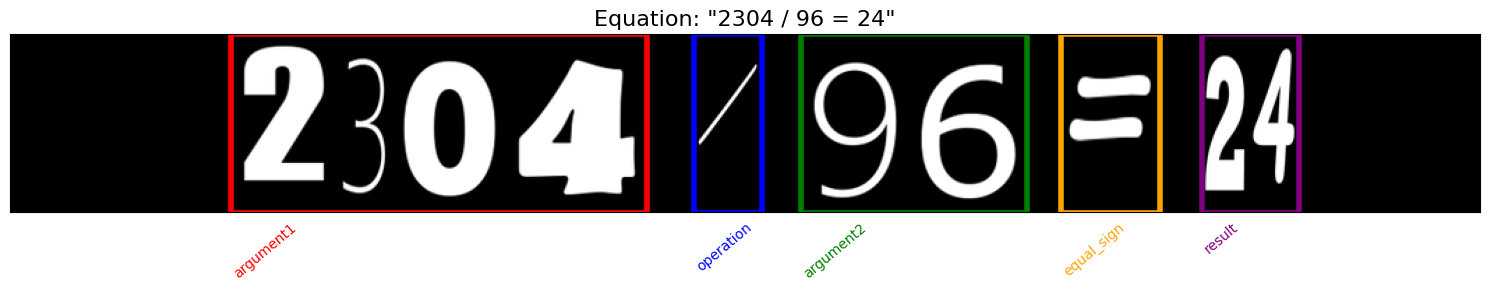

Equation: "2304 / 96 = 24"
Simple description: An image of size 128x1054 of the equation "2304 / 96 = 24" (with the division operation), the digits and characters have varied vertical positions and have non-uniform widths, using many different mixed fonts (10)
Additional description: First argument has 4 digits, second argument has 2 digits, result has 2 digits. 1st argument is at timepoints [158, 456], operation symbol is at [490, 539], 2nd argument is at [567, 729], equal sign is at [753, 824], and the result at [854, 924]

Bounding box locations:
argument1: [158, 456]
operation: [490, 539]
argument2: [567, 729]
equal_sign: [753, 824]
result: [854, 924]


In [16]:
# Display equation image with colored bounding boxes

# Randomly select a single row from the dataframe
selected_row = df.sample(n=1).iloc[0]

# Load the equation image
eq_img_path = os.path.join(dataset_folder, 'equation_images', selected_row['image_filename'])
eq_img = Image.open(eq_img_path)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Display the equation image
ax.imshow(eq_img, cmap='gray')

# Define colors for each part
colors = ['red', 'blue', 'green', 'orange', 'purple']
parts = ['argument1', 'operation', 'argument2', 'equal_sign', 'result']

# Create bounding boxes
for part, color in zip(parts, colors):
    start = selected_row[f'{part}_start']
    end = selected_row[f'{part}_end']
    rect = plt.Rectangle((start, 0), end - start, eq_img.height, 
                         fill=False, edgecolor=color, linewidth=4)
    ax.add_patch(rect)
    ax.text(start, eq_img.height + 5, part, color=color, 
            ha='left', va='top', rotation=40, fontsize=10)

# Set title and remove axis ticks
ax.set_title(f"Equation: \"{selected_row['full string']}\"", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print information about the selected equation
print(f"Equation: \"{selected_row['full string']}\"")
print(f"Simple description: {selected_row['simple_description']}")
print(f"Additional description: {selected_row['additional_description']}")
print("\nBounding box locations:")
for part in parts:
    print(f"{part}: [{selected_row[f'{part}_start']}, {selected_row[f'{part}_end']}]")


# Display another equation image with colored bounding boxes

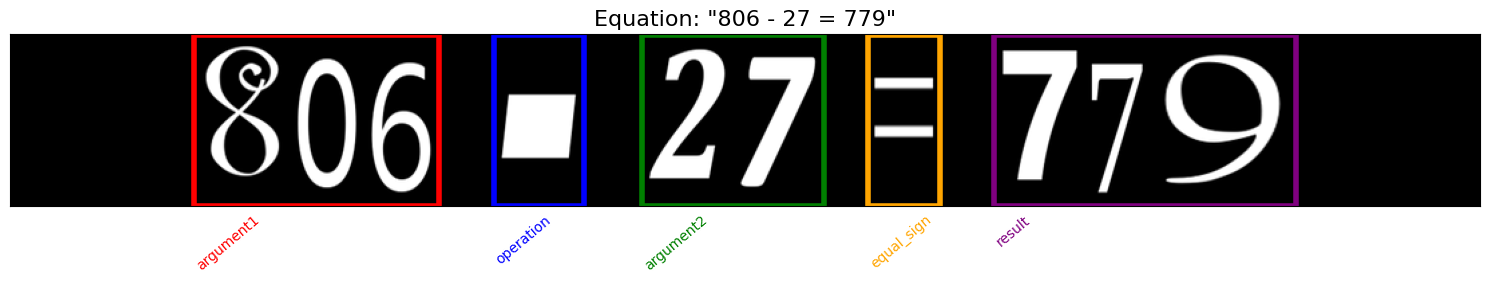

Equation: "806 - 27 = 779"
Simple description: An image of size 128x1099 of the equation "806 - 27 = 779" (with the subtraction operation), the digits and characters have varied vertical positions and have non-uniform widths, using many different mixed fonts (9)
Additional description: First argument has 3 digits, second argument has 2 digits, result has 3 digits. 1st argument is at timepoints [137, 320], operation symbol is at [361, 429], 2nd argument is at [472, 608], equal sign is at [641, 695], and the result at [735, 961]

Bounding box locations:
argument1: [137, 320]
operation: [361, 429]
argument2: [472, 608]
equal_sign: [641, 695]
result: [735, 961]


In [28]:
# Display equation image with colored bounding boxes

# Randomly select a single row from the dataframe
selected_row = df.sample(n=1).iloc[0]

# Load the equation image
eq_img_path = os.path.join(dataset_folder, 'equation_images', selected_row['image_filename'])
eq_img = Image.open(eq_img_path)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Display the equation image
ax.imshow(eq_img, cmap='gray')

# Define colors for each part
colors = ['red', 'blue', 'green', 'orange', 'purple']
parts = ['argument1', 'operation', 'argument2', 'equal_sign', 'result']

# Create bounding boxes
for part, color in zip(parts, colors):
    start = selected_row[f'{part}_start']
    end = selected_row[f'{part}_end']
    rect = plt.Rectangle((start, 0), end - start, eq_img.height, 
                         fill=False, edgecolor=color, linewidth=4)
    ax.add_patch(rect)
    ax.text(start, eq_img.height + 5, part, color=color, 
            ha='left', va='top', rotation=40, fontsize=10)

# Set title and remove axis ticks
ax.set_title(f"Equation: \"{selected_row['full string']}\"", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print information about the selected equation
print(f"Equation: \"{selected_row['full string']}\"")
print(f"Simple description: {selected_row['simple_description']}")
print(f"Additional description: {selected_row['additional_description']}")
print("\nBounding box locations:")
for part in parts:
    print(f"{part}: [{selected_row[f'{part}_start']}, {selected_row[f'{part}_end']}]")
